In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, SkewT, Hodograph
from metpy.units import units
from datetime import datetime
from siphon.simplewebservice.wyoming import WyomingUpperAir
from metpy.calc import resample_nn_1d
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

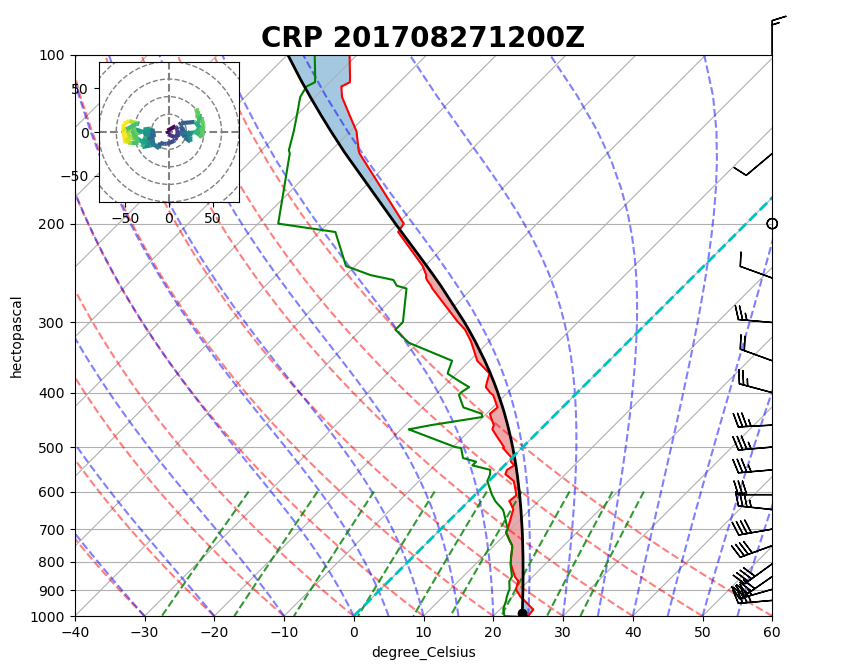

In [5]:
###Source code is courtesy of MetPy (Unidata); modifications made by Noah Brauer 2018 & Stacey Hitchcock 2023


# Enter the date of your all-star sounding here (yyyy,m,dd,hh)
date = datetime(2017, 8, 27, 12)

#Enter the station here:

station = 'CRP'

####################################################
# Make the request (a pandas dataframe is returned). This fetches your All-Star Sounding from the University of Wyoming sounding archives
df = WyomingUpperAir.request_data(date, station)

####################################################

#%%T
col_names = ['pressure', 'height', 'temperature', 'dewpoint', 'direction', 'speed']

# Drop any rows with all NaN values for T, Td, winds
df = df.dropna(subset=('temperature', 'dewpoint', 'direction', 'speed',
                       'u_wind','v_wind'), how='all').reset_index(drop=True)

#Metpy likes for everything to be assigned units, 
# this is good, it reduces mistakes!

p = df['pressure'].values * units.hPa
T = df['temperature'].values * units.degC
Td = df['dewpoint'].values * units.degC
wind_speed = df['speed'].values * units.knots
wind_dir = df['direction'].values * units.degrees
u_wind=df['u_wind'].values * units.knots
v_wind=df['v_wind'].values * units.knots


#u_wind, v_wind = mpcalc.wind_components(wind_speed, wind_dir)


###wind speed and dir are cols = 5,6; only plot winds every 50 mb. You can modify this if desired. 

interval = np.arange(100,1000,50) * units('mbar')
ix = resample_nn_1d(p,interval)

    
#%%

#Can change the size of the figure by modifying 'figsize' to desired dimensions

fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig, rotation=45)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')


skew.plot_barbs(p[ix], df.u_wind[ix], df.v_wind[ix])
  
    
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 60)

# Calculate LCL height and plot as black dot
lcl_pressure, lcl_temperature = mpcalc.lcl(p[0], T[0], Td[0])
skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')

# Calculate full parcel profile and add to plot as black line
prof = mpcalc.parcel_profile(p, T[0], Td[0]).to('degC')
skew.plot(p, prof, 'k', linewidth=2)

# Shade areas of CAPE and CIN; You may want to comment these next two lines out if CAPE isn't an applicable property. 



skew.shade_cin(p, T, prof)
skew.shade_cape(p, T, prof)

# An example of a slanted line at constant T -- in this case the 0
# isotherm
skew.ax.axvline(0, color='c', linestyle='--', linewidth=2)

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

#Enter the appropriate title
#plt.title('<Enter your title here>', weight = 'bold', size = 20)

plt.title('CRP 201708271200Z', weight = 'bold', size = 20)


##If applicable, you can add a hodograph (say, if you have a severe wx sounding); If not, comment out

ax_hod = inset_axes(skew.ax, '25%', '25%', loc=2)  #Change the 30% to alter size, currently plotting in top left (can change loc)
h = Hodograph(ax_hod, component_range=80.) #Change range in windspeeds 
h.add_grid(increment=20)
h.plot_colormapped(u_wind, v_wind, wind_speed)

# Show the plot
plt.show()

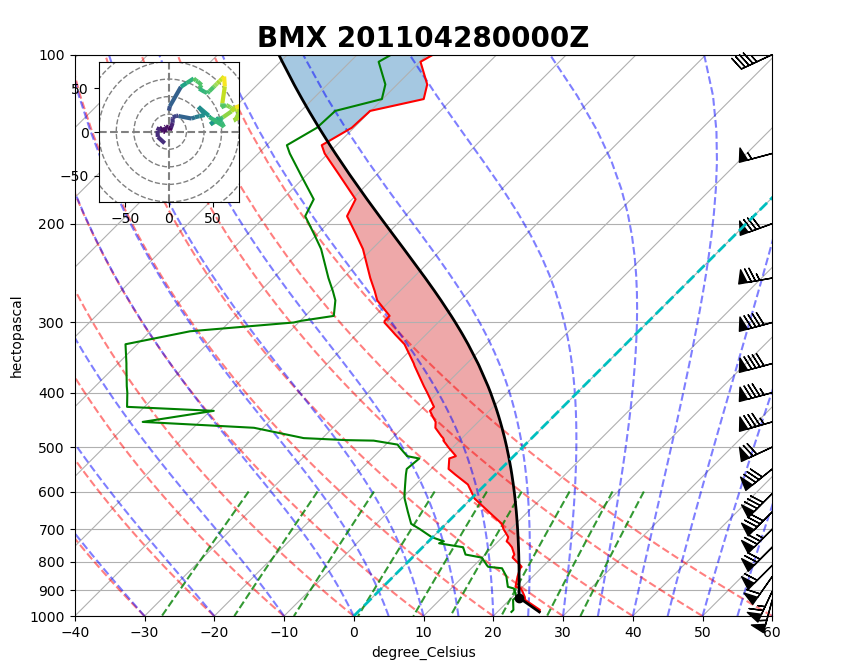

In [6]:
###Source code is courtesy of MetPy (Unidata); modifications made by Noah Brauer 2018 & Stacey Hitchcock 2023


# Enter the date of your all-star sounding here (yyyy,m,dd,hh)
date = datetime(2011, 4, 28, 00)

#Enter the station here:

station = 'BMX'

####################################################
# Make the request (a pandas dataframe is returned). This fetches your All-Star Sounding from the University of Wyoming sounding archives
df = WyomingUpperAir.request_data(date, station)

####################################################

#%%T
col_names = ['pressure', 'height', 'temperature', 'dewpoint', 'direction', 'speed']

# Drop any rows with all NaN values for T, Td, winds
df = df.dropna(subset=('temperature', 'dewpoint', 'direction', 'speed',
                       'u_wind','v_wind'), how='all').reset_index(drop=True)

#Metpy likes for everything to be assigned units, 
# this is good, it reduces mistakes!

p = df['pressure'].values * units.hPa
T = df['temperature'].values * units.degC
Td = df['dewpoint'].values * units.degC
wind_speed = df['speed'].values * units.knots
wind_dir = df['direction'].values * units.degrees
u_wind=df['u_wind'].values * units.knots
v_wind=df['v_wind'].values * units.knots


#u_wind, v_wind = mpcalc.wind_components(wind_speed, wind_dir)


###wind speed and dir are cols = 5,6; only plot winds every 50 mb. You can modify this if desired. 

interval = np.arange(100,1000,50) * units('mbar')
ix = resample_nn_1d(p,interval)

    
#%%

#Can change the size of the figure by modifying 'figsize' to desired dimensions

fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig, rotation=45)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')


skew.plot_barbs(p[ix], df.u_wind[ix], df.v_wind[ix])
  
    
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 60)

# Calculate LCL height and plot as black dot
lcl_pressure, lcl_temperature = mpcalc.lcl(p[0], T[0], Td[0])
skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')

# Calculate full parcel profile and add to plot as black line
prof = mpcalc.parcel_profile(p, T[0], Td[0]).to('degC')
skew.plot(p, prof, 'k', linewidth=2)

# Shade areas of CAPE and CIN; You may want to comment these next two lines out if CAPE isn't an applicable property. 



skew.shade_cin(p, T, prof)
skew.shade_cape(p, T, prof)

# An example of a slanted line at constant T -- in this case the 0
# isotherm
skew.ax.axvline(0, color='c', linestyle='--', linewidth=2)

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

#Enter the appropriate title
#plt.title('<Enter your title here>', weight = 'bold', size = 20)

plt.title('BMX 201104280000Z', weight = 'bold', size = 20)


##If applicable, you can add a hodograph (say, if you have a severe wx sounding); If not, comment out

ax_hod = inset_axes(skew.ax, '25%', '25%', loc=2)  #Change the 30% to alter size, currently plotting in top left (can change loc)
h = Hodograph(ax_hod, component_range=80.) #Change range in windspeeds 
h.add_grid(increment=20)
h.plot_colormapped(u_wind, v_wind, wind_speed)

# Show the plot
plt.show()